# Load required libraries

In [1]:
%config Completer.use_jedi = False

import sys
sys.path.append("../lib/") # Path of the profile_analysis_class library
from importlib import reload
import profile_analysis_class
reload(profile_analysis_class)
from profile_analysis_class import ProfileAnalysis
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('../assets/styles/plotting_style.mplstyle') # Matplotlip plotting style sheet (OPTIONAL)

pa=ProfileAnalysis('.') # Where to run the analysis

Project has been created!


/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:127: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:133: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:139: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:145: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:151: UserWarning: Folder data_fitting already exist...ski

# Assign each sample to a section and plot distribution

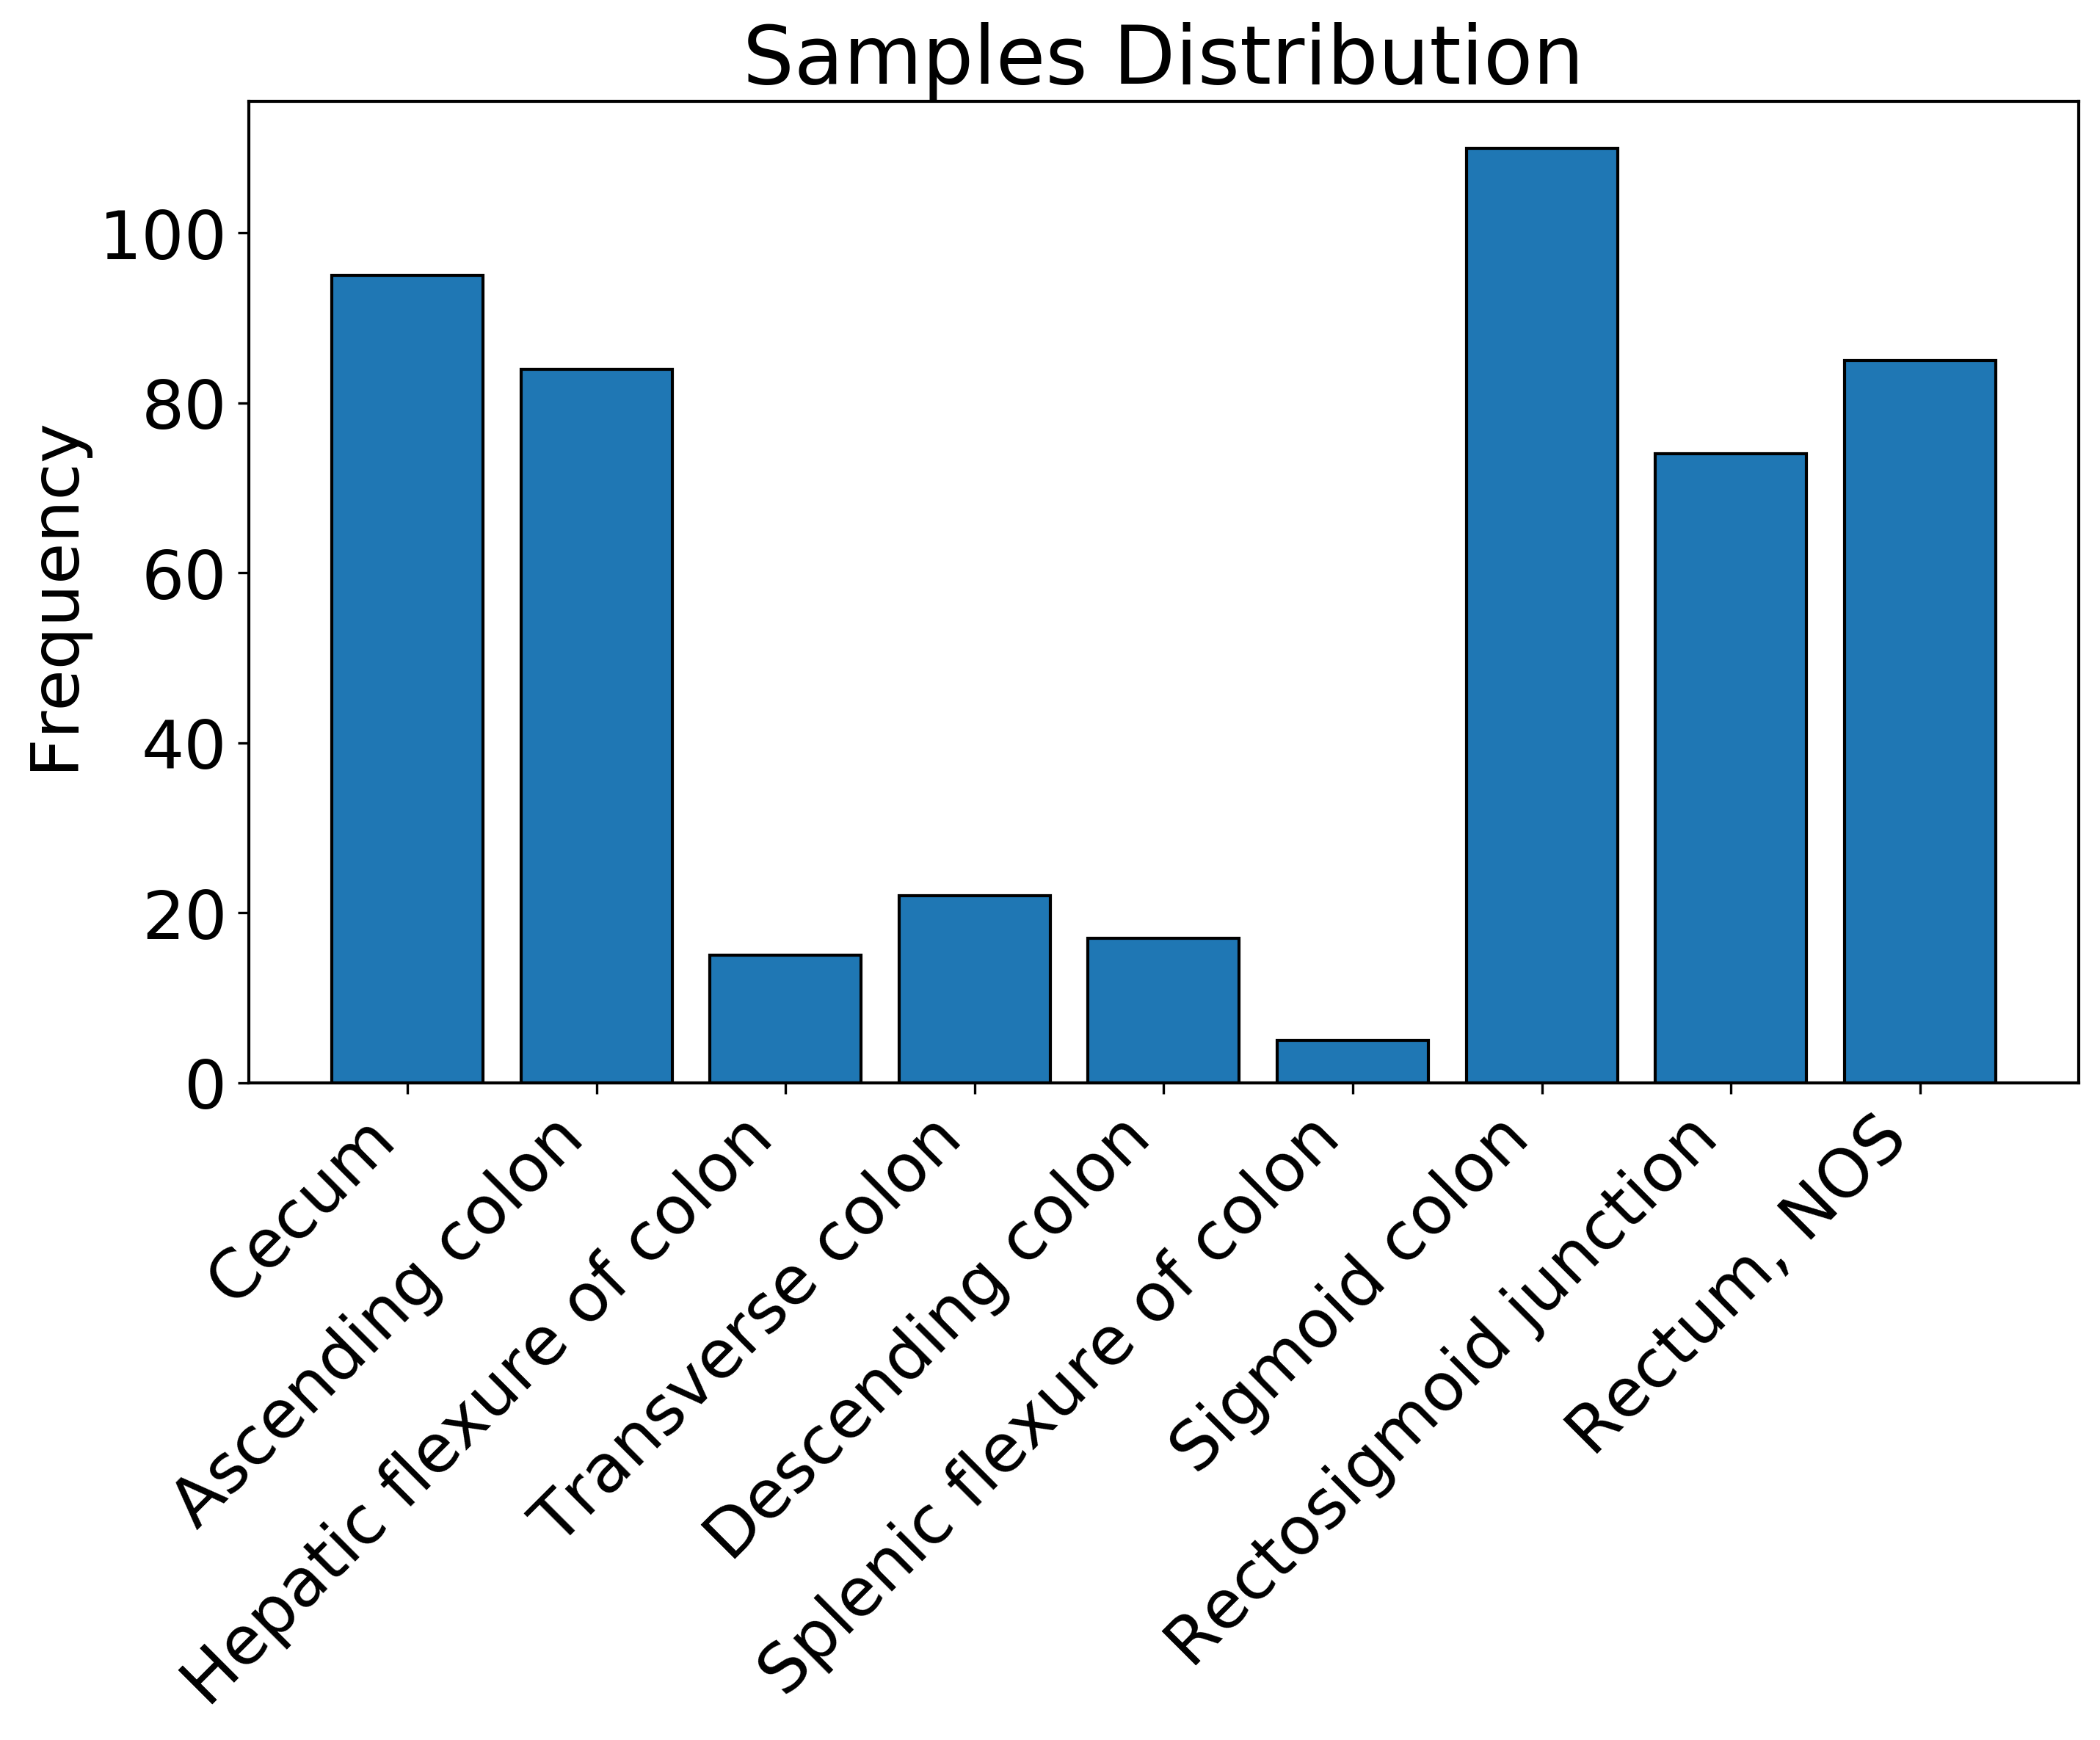

In [2]:
pa.create_samples_to_sections_table()
pa.plot_sample_distribution()

# Calculate median and median average deviation for each section

In [3]:
medians, mad=pa.median_by_section(remove_outliers=False, scale=False)
medians.head()

This step has already been executed...loading results...
This step has already been executed...loading results...


,Cecum,Ascending colon,Hepatic flexure of colon,Transverse colon,Descending colon,Sigmoid colon,Rectosigmoid junction,"Rectum, NOS"
ensmbl_id,,,,,,,,
ENSG00000000003,73.637831,79.629240,103.124233,75.913878,82.543993,135.094292,131.564108,100.136352
ENSG00000000005,0.992449,0.759070,1.336772,0.798797,1.680453,1.607038,1.829135,1.402538
ENSG00000000419,100.154703,105.029086,117.657759,97.626225,154.401872,173.674444,138.032651,142.622256
ENSG00000000457,6.912029,6.640371,7.004861,7.278464,7.113812,7.110153,7.174294,6.944052
ENSG00000000460,5.266616,4.969358,5.424937,4.844178,6.057782,5.917231,5.613395,6.109475


# Fitting observables with linear polynomial and sigmoid models

In [4]:
models_scores, poly_obs_fit_scores, sig_obs_fit_scores, poly_models, sig_models=pa.fit_data(medians, mad, guess_bounds = True, dog_allowed=False)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


# Fitting random permutated data with linear polynomial and sigmoid models

In [5]:
poly_perm_fit_scores, sig_perm_fit_scores=pa.fit_random_data(medians, mad, guess_bounds = True, dog_allowed=True)

This step has already been executed...loading results...
This step has already been executed...loading results...


# Evaluate performance of each model

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


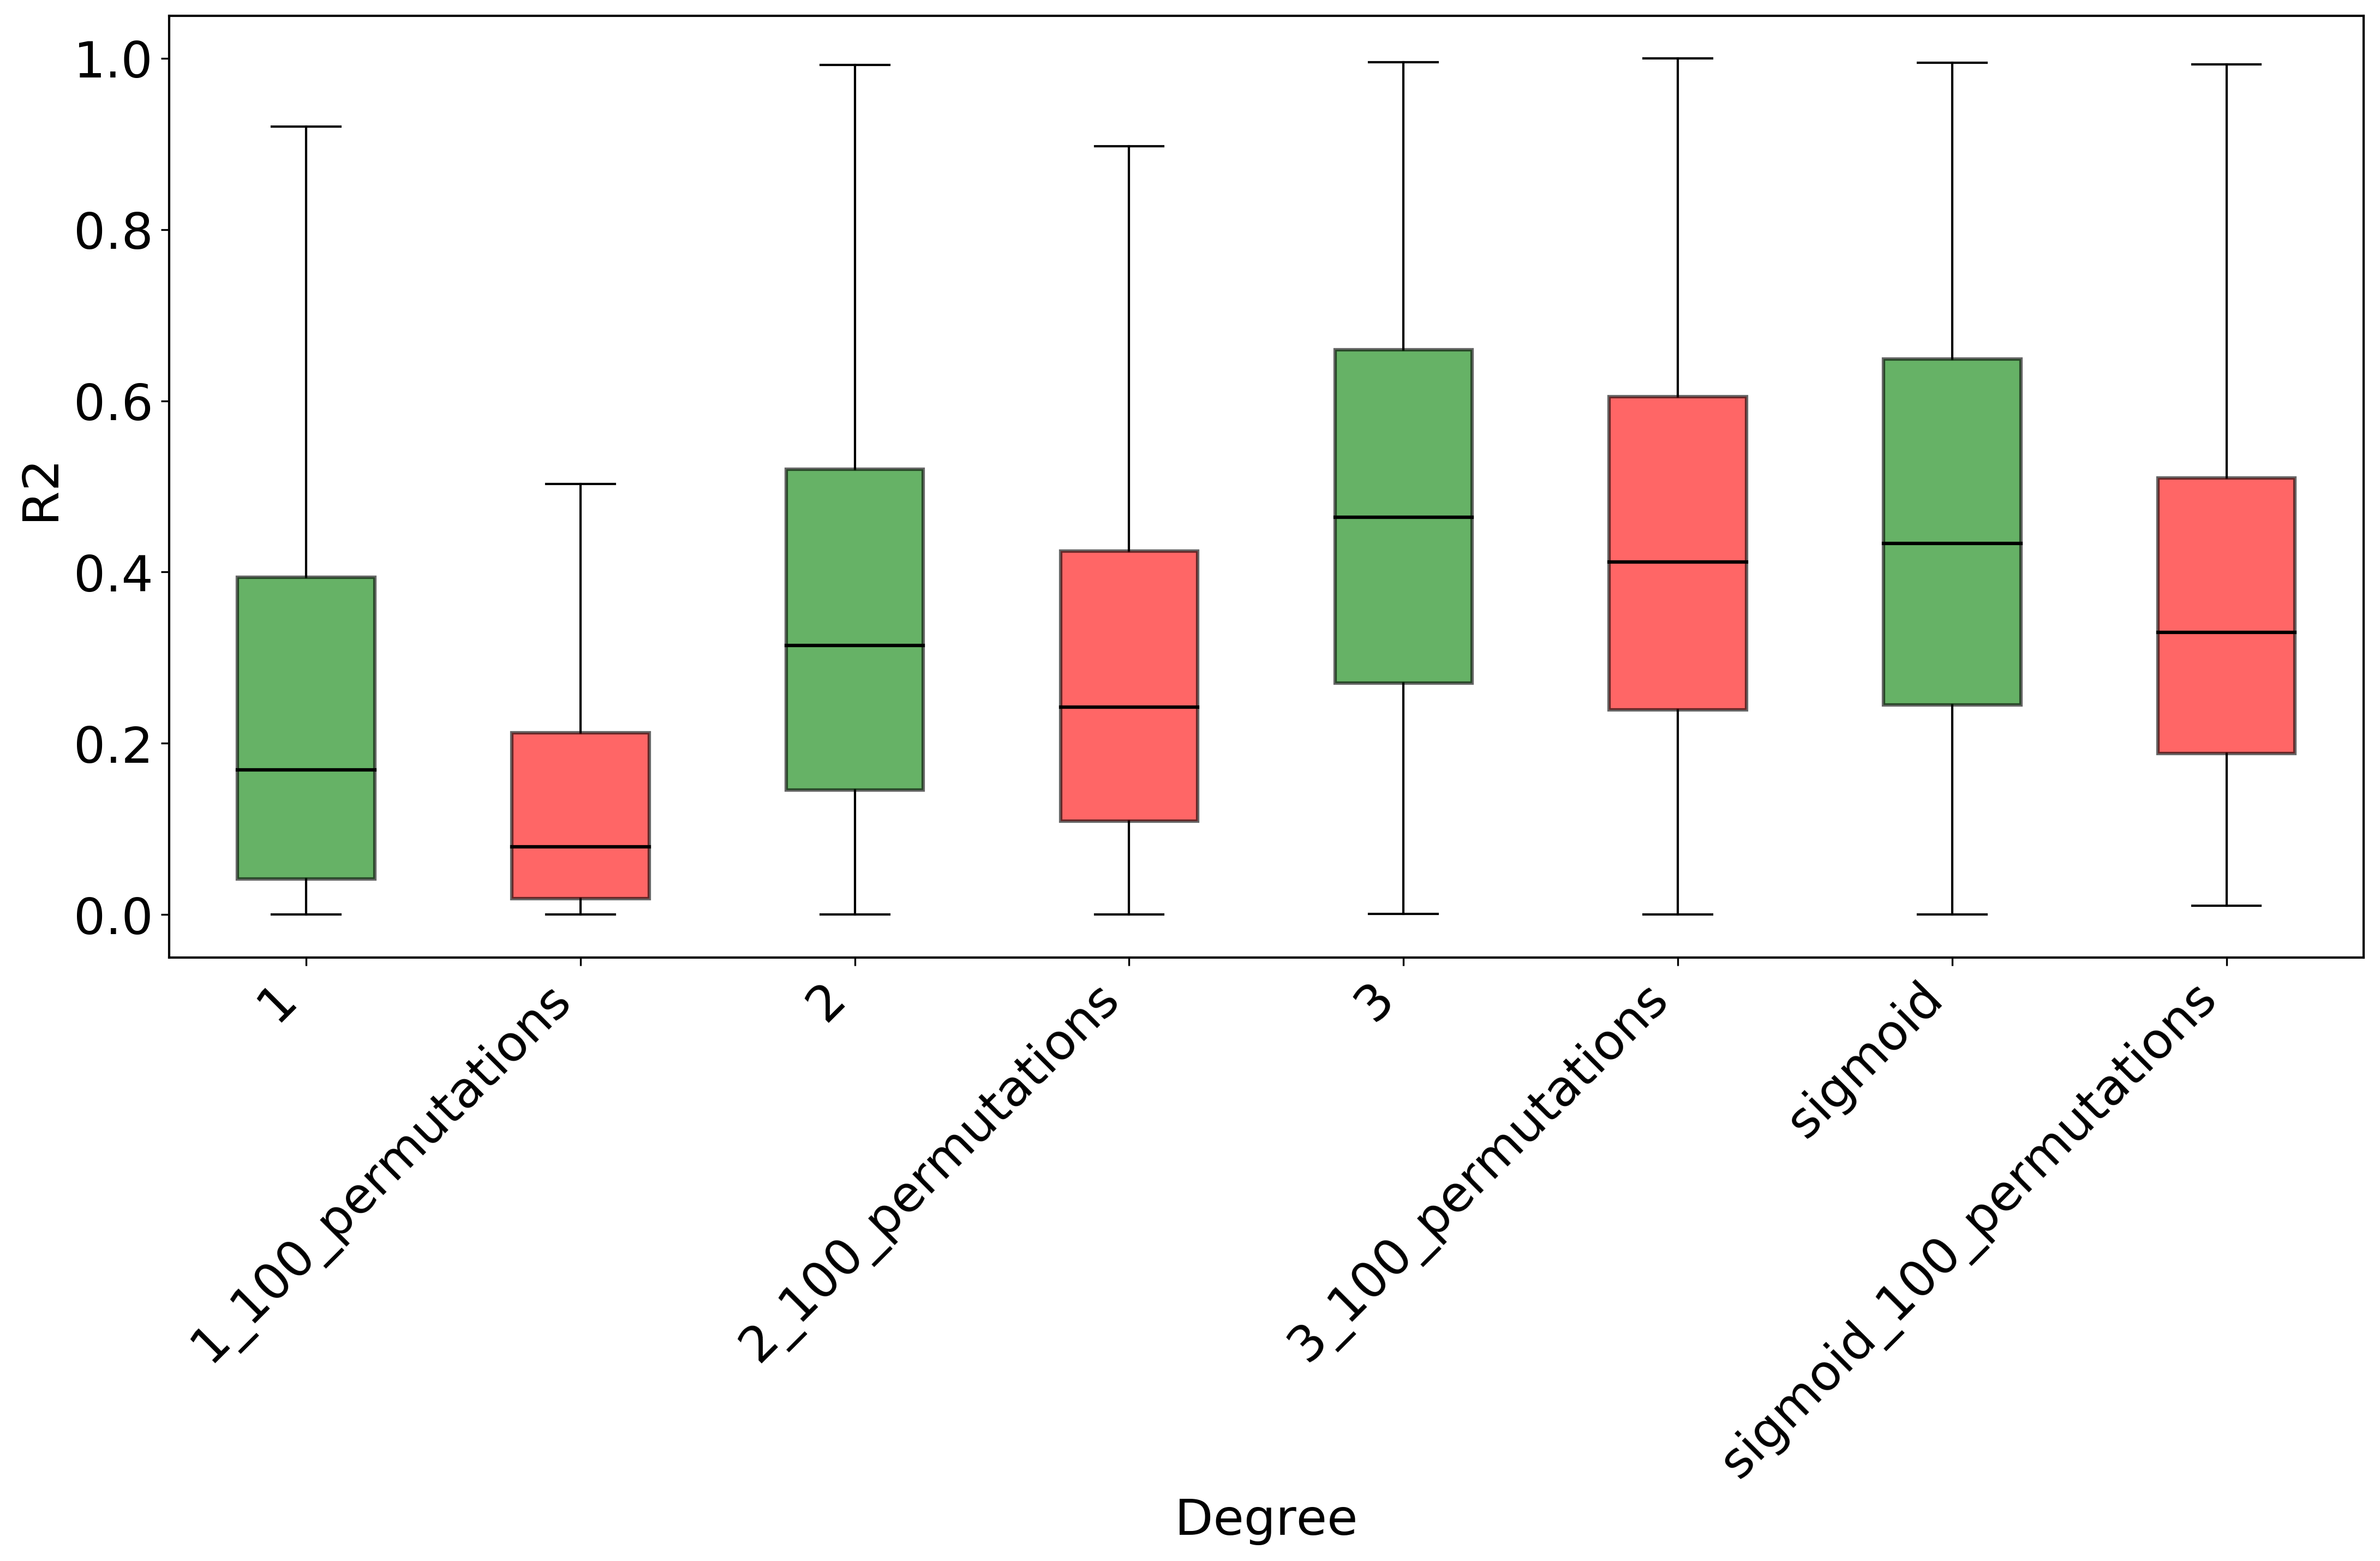

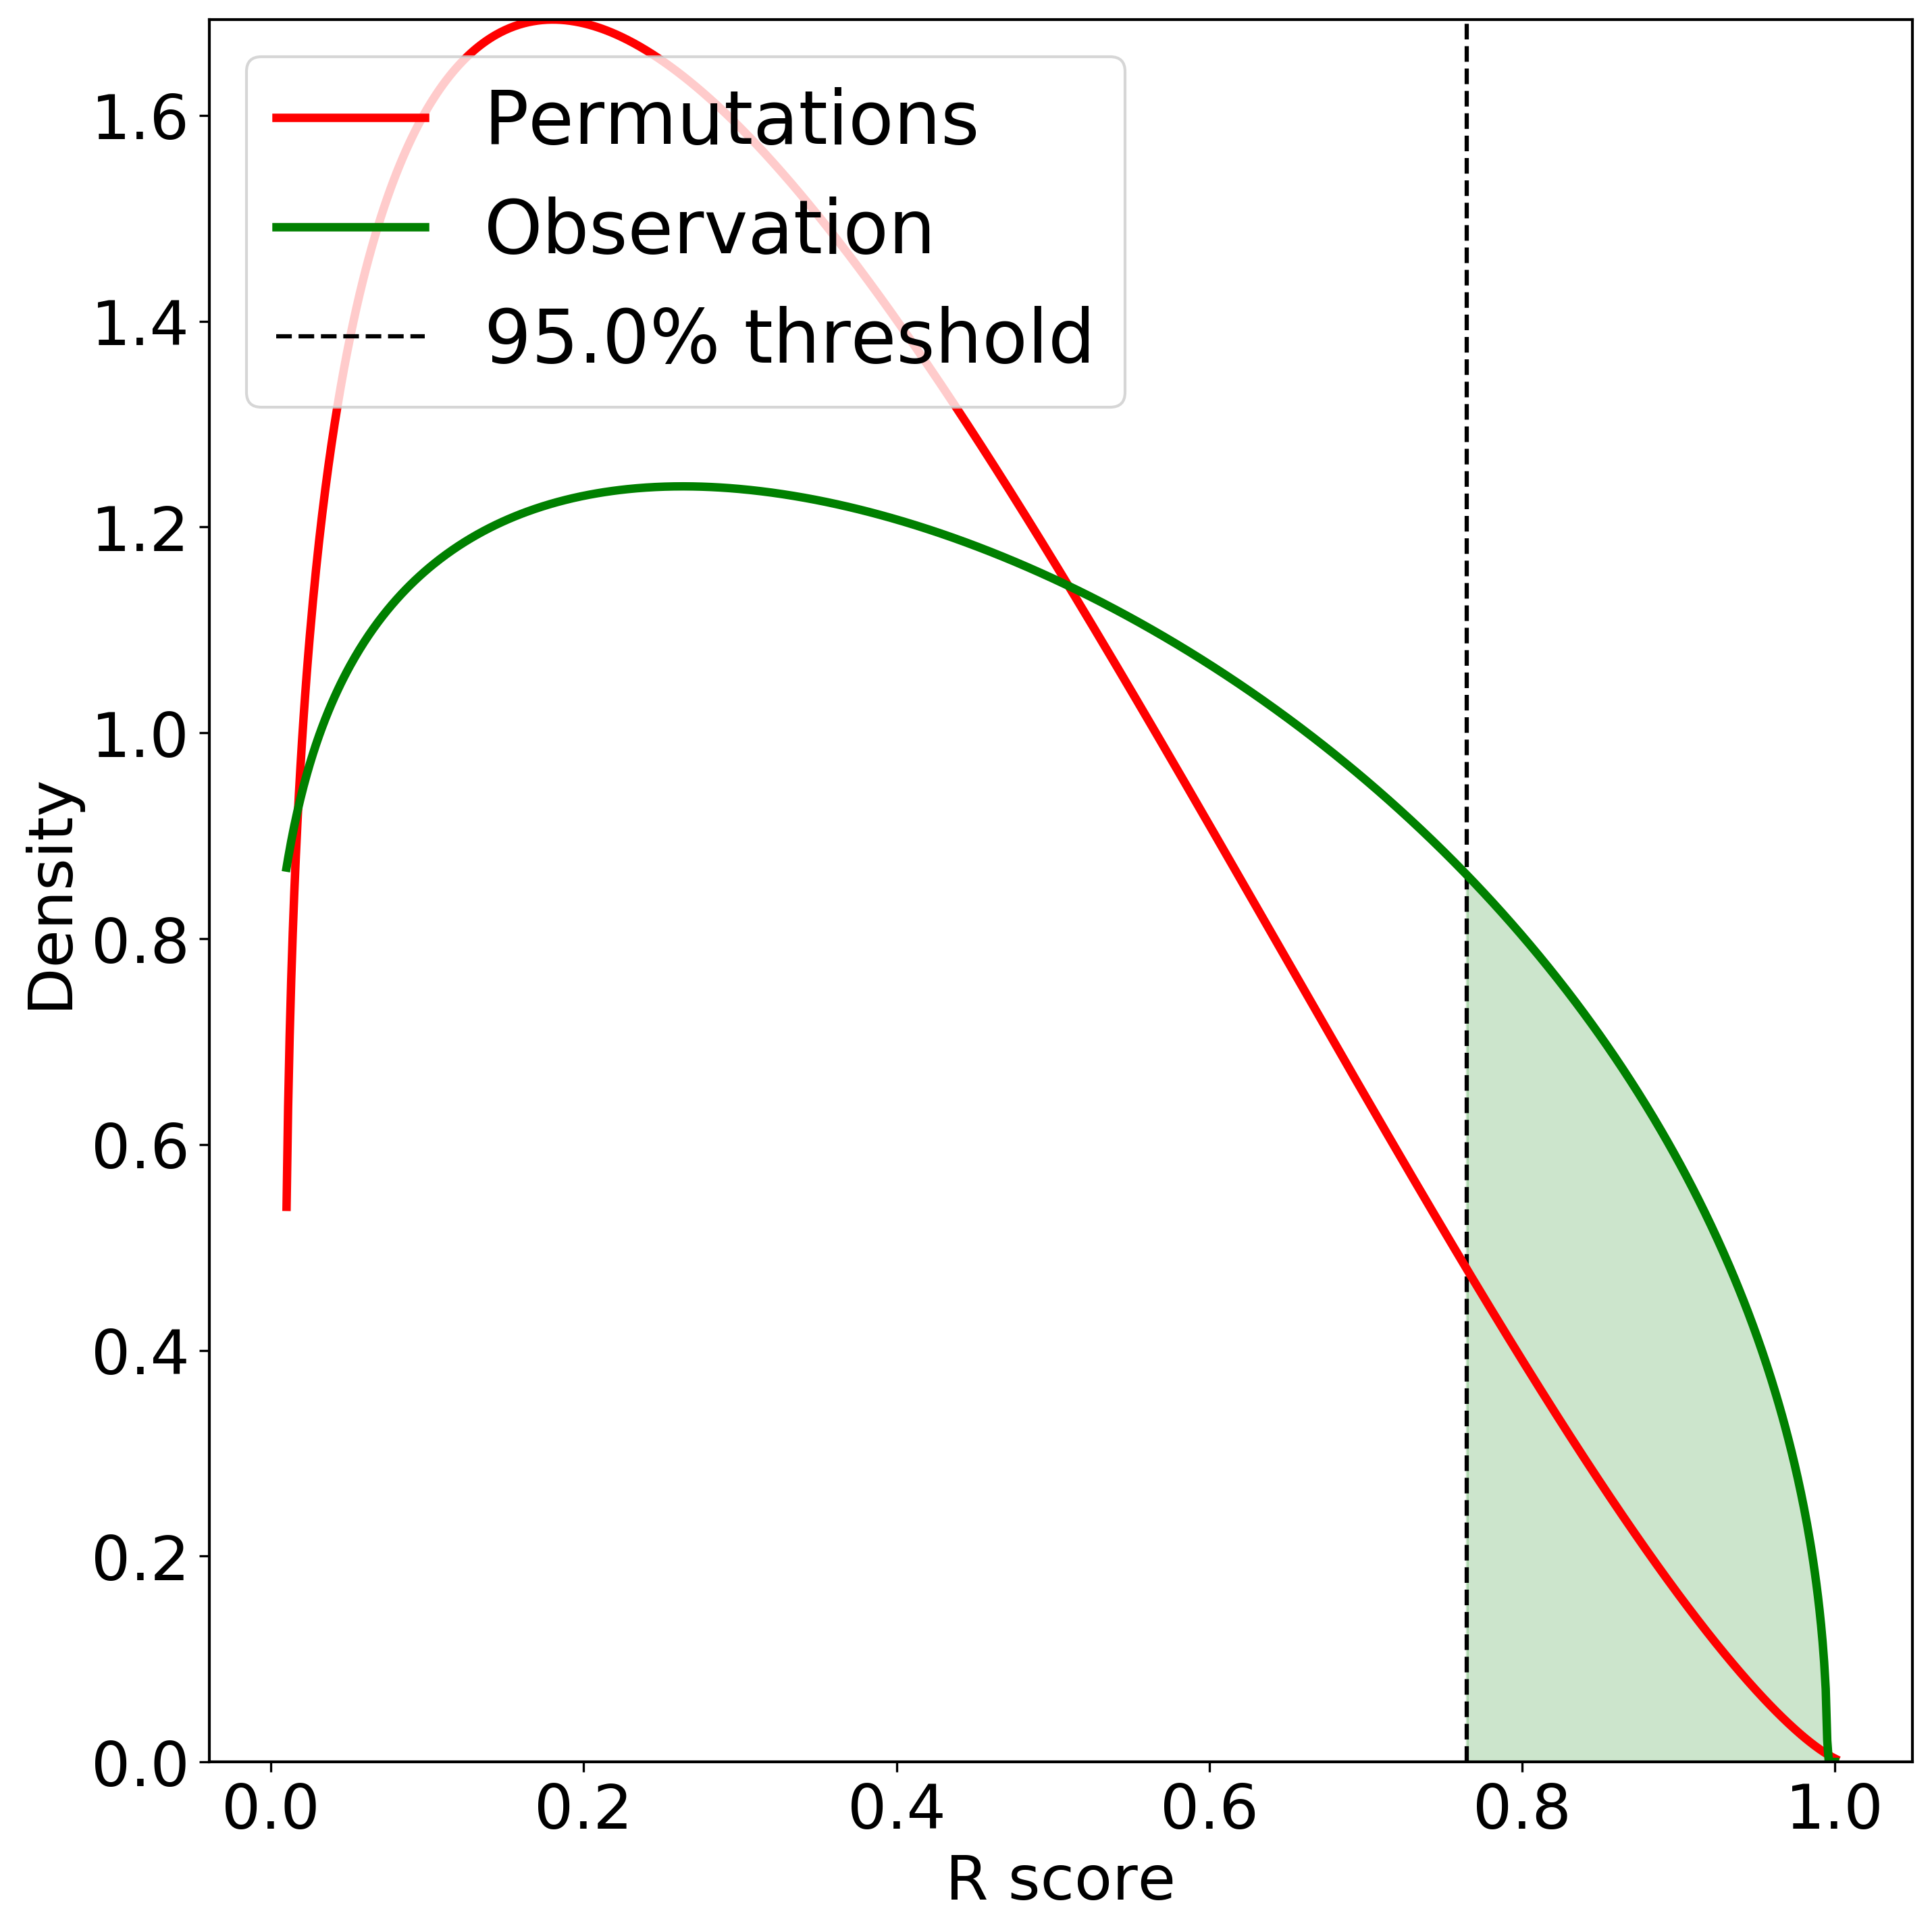

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


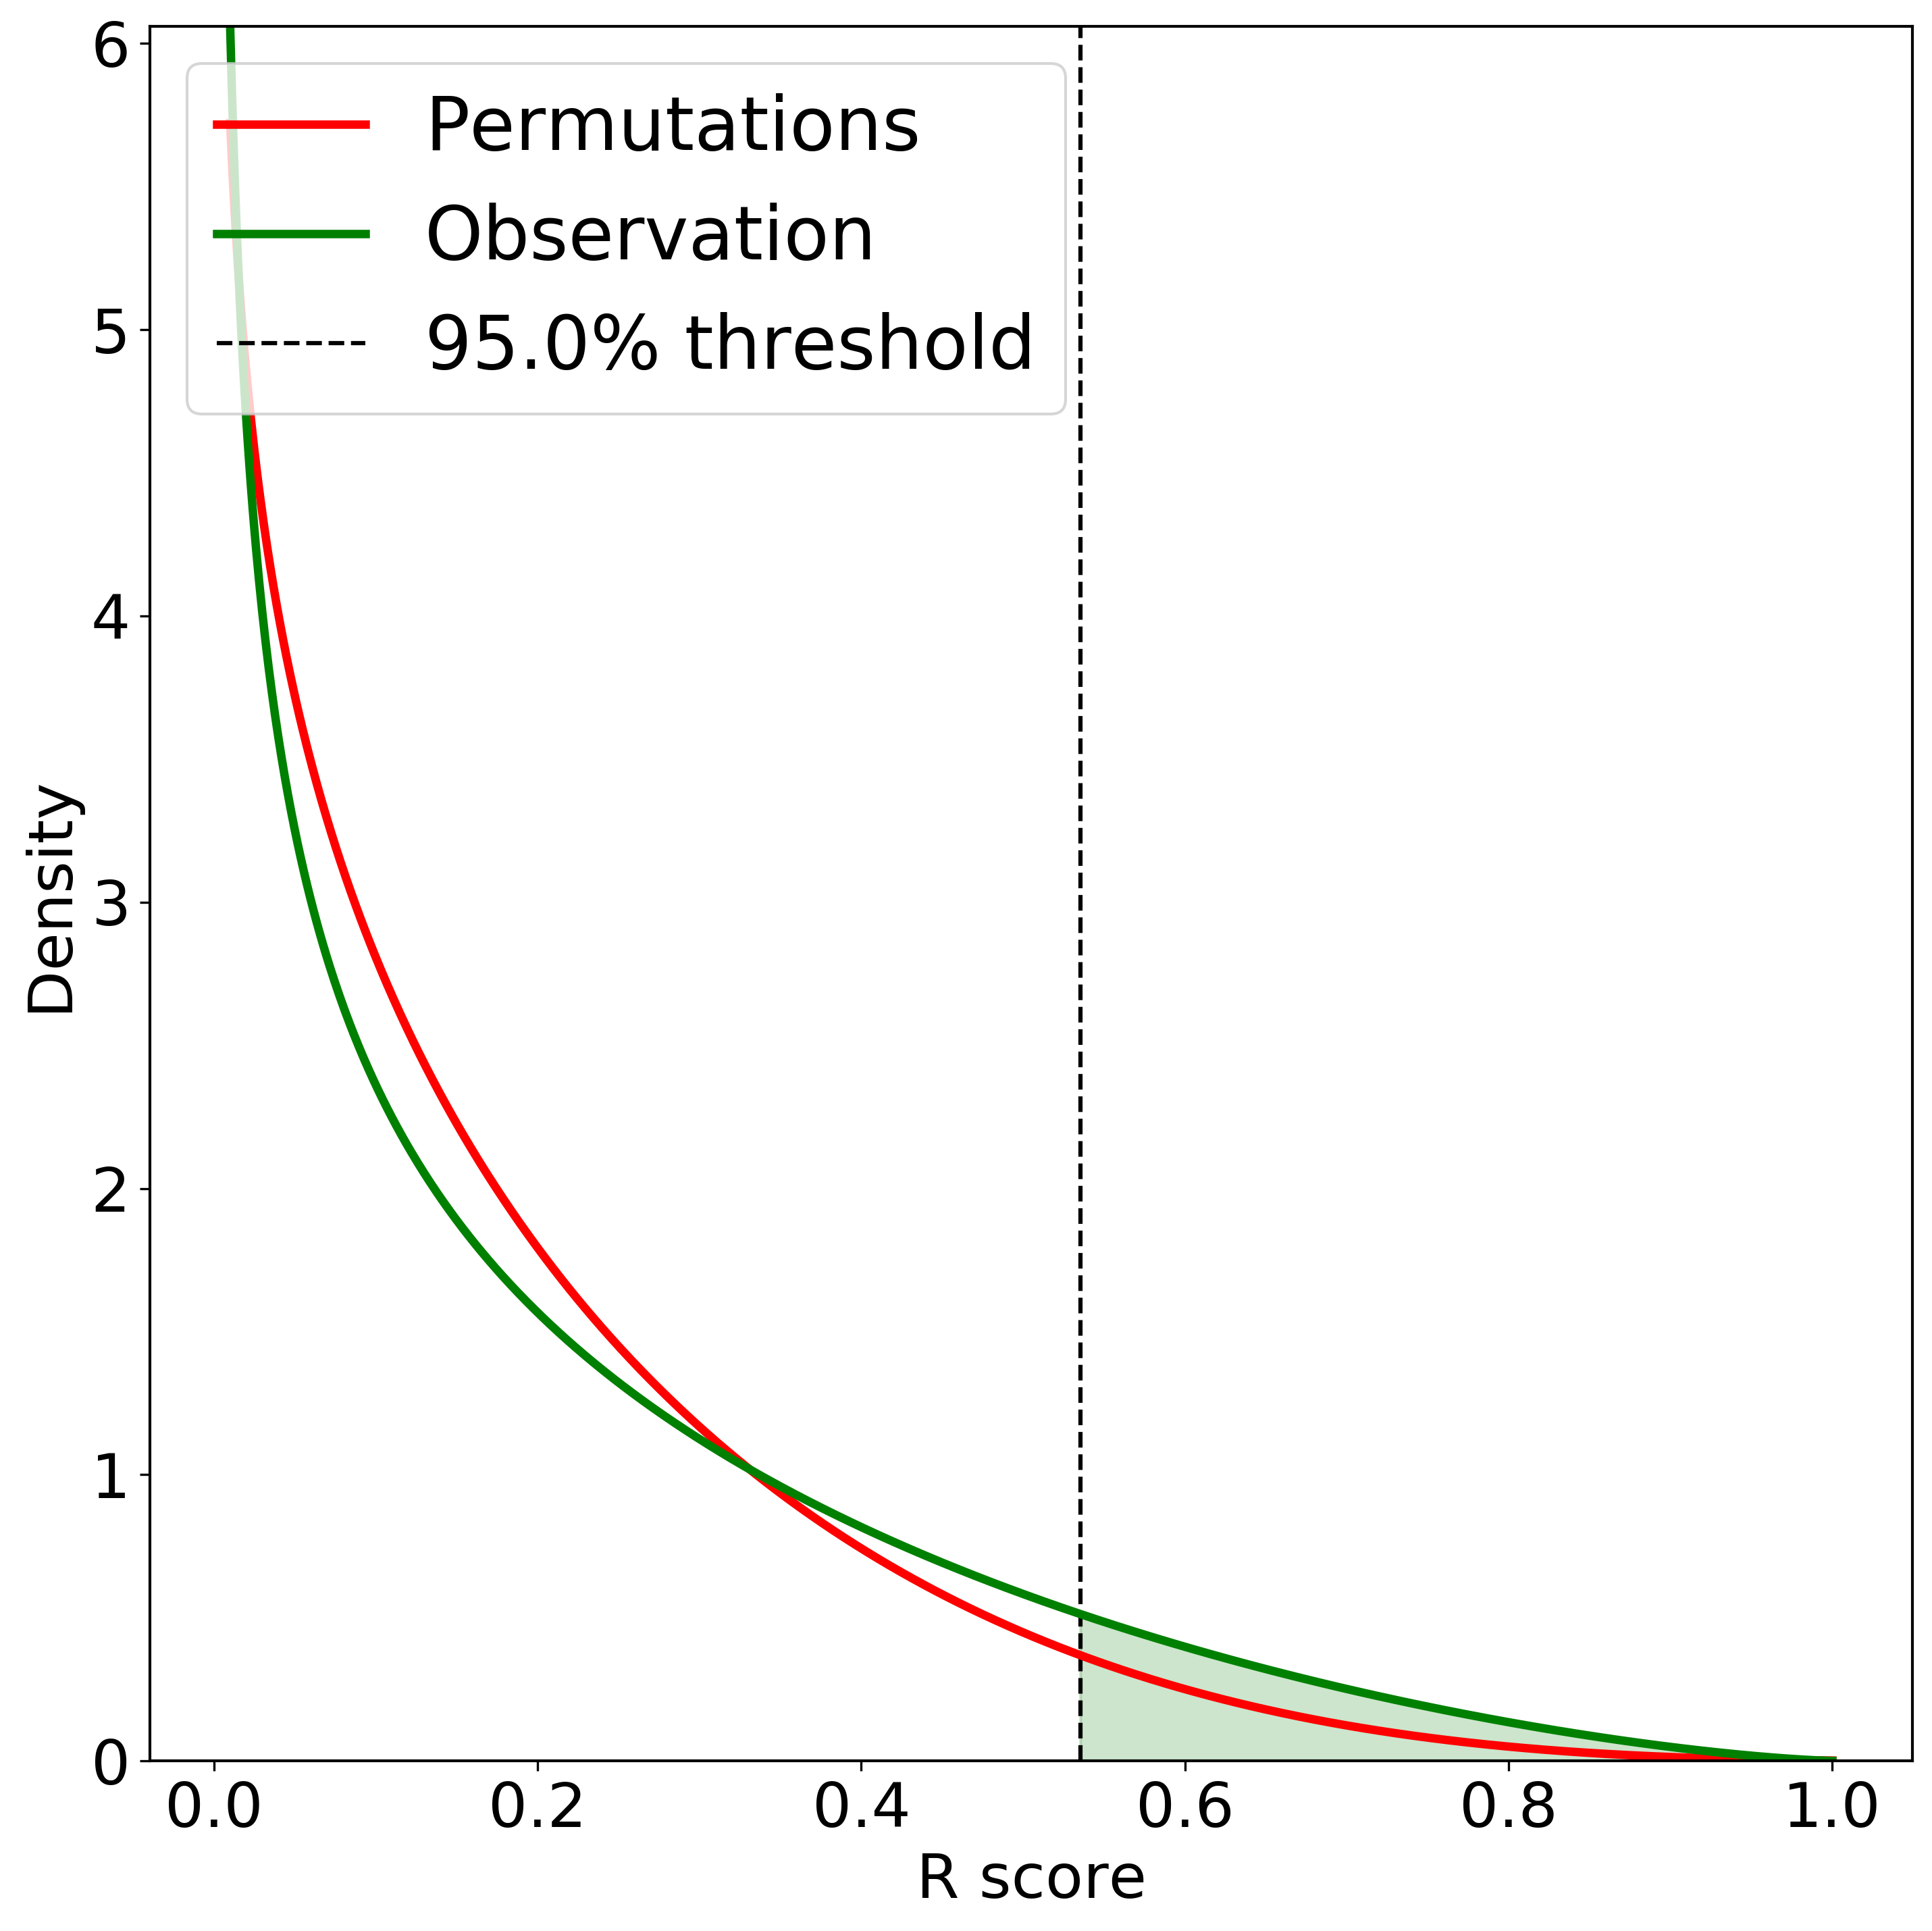

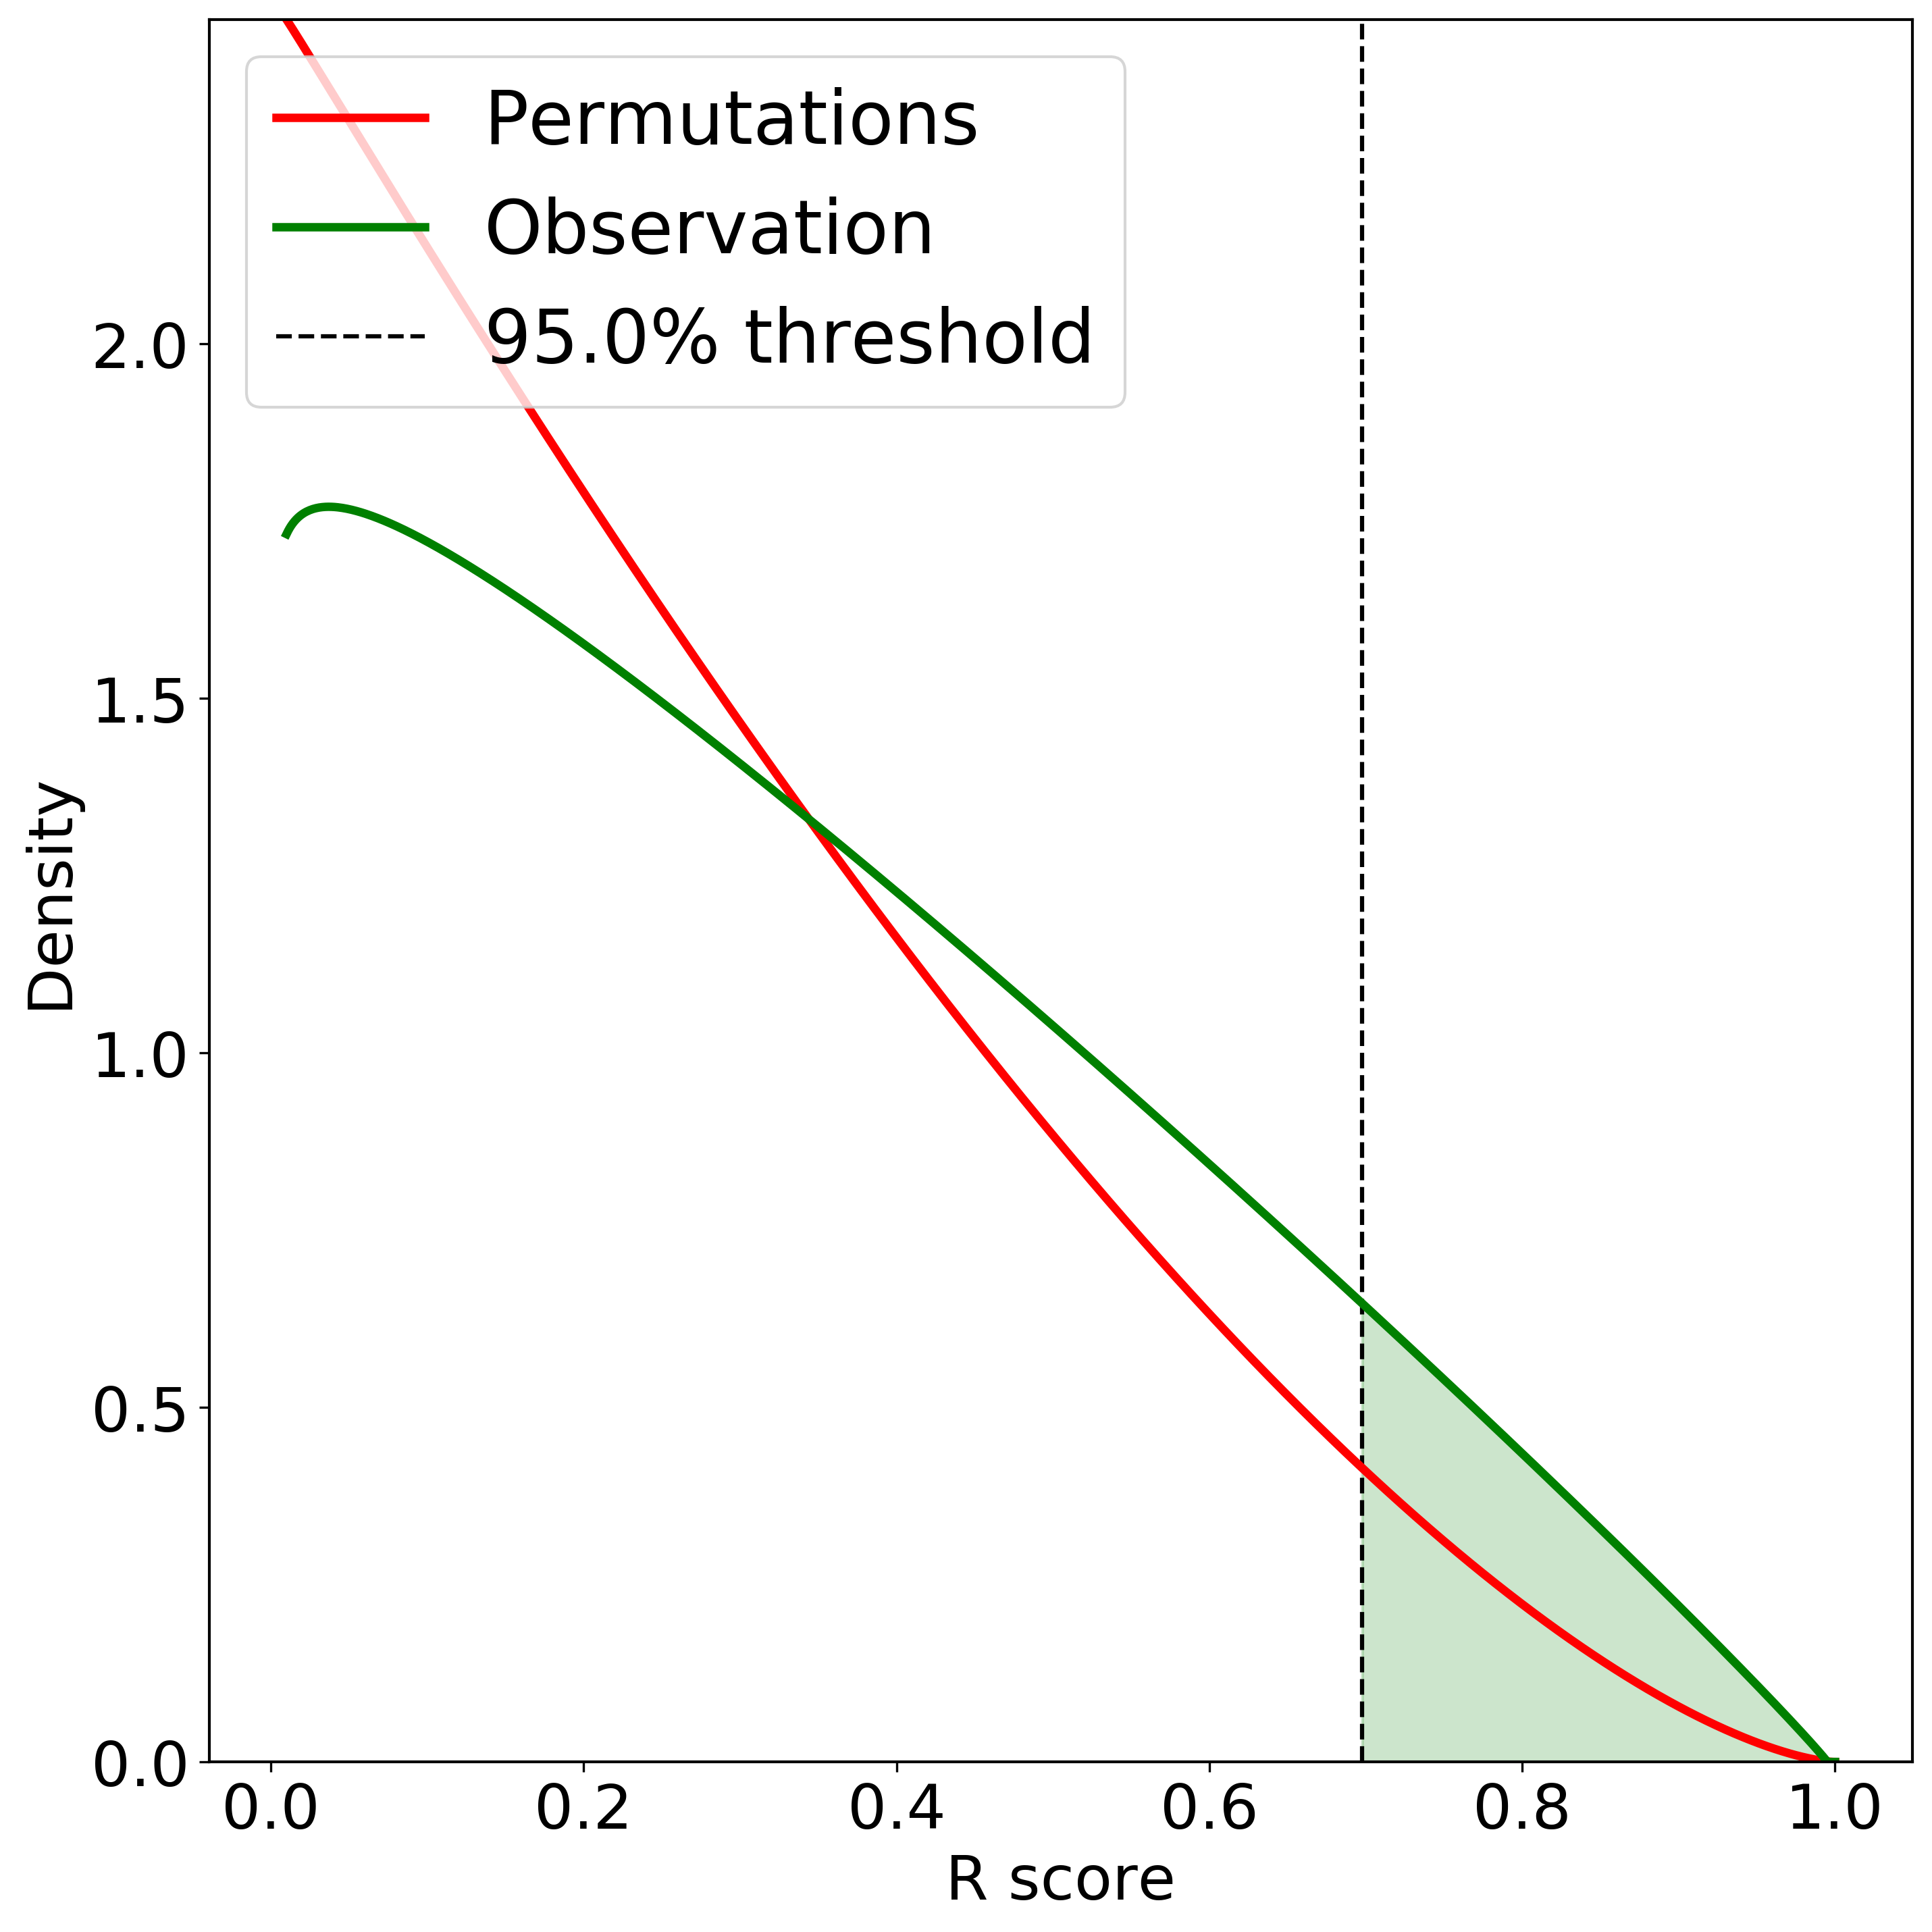

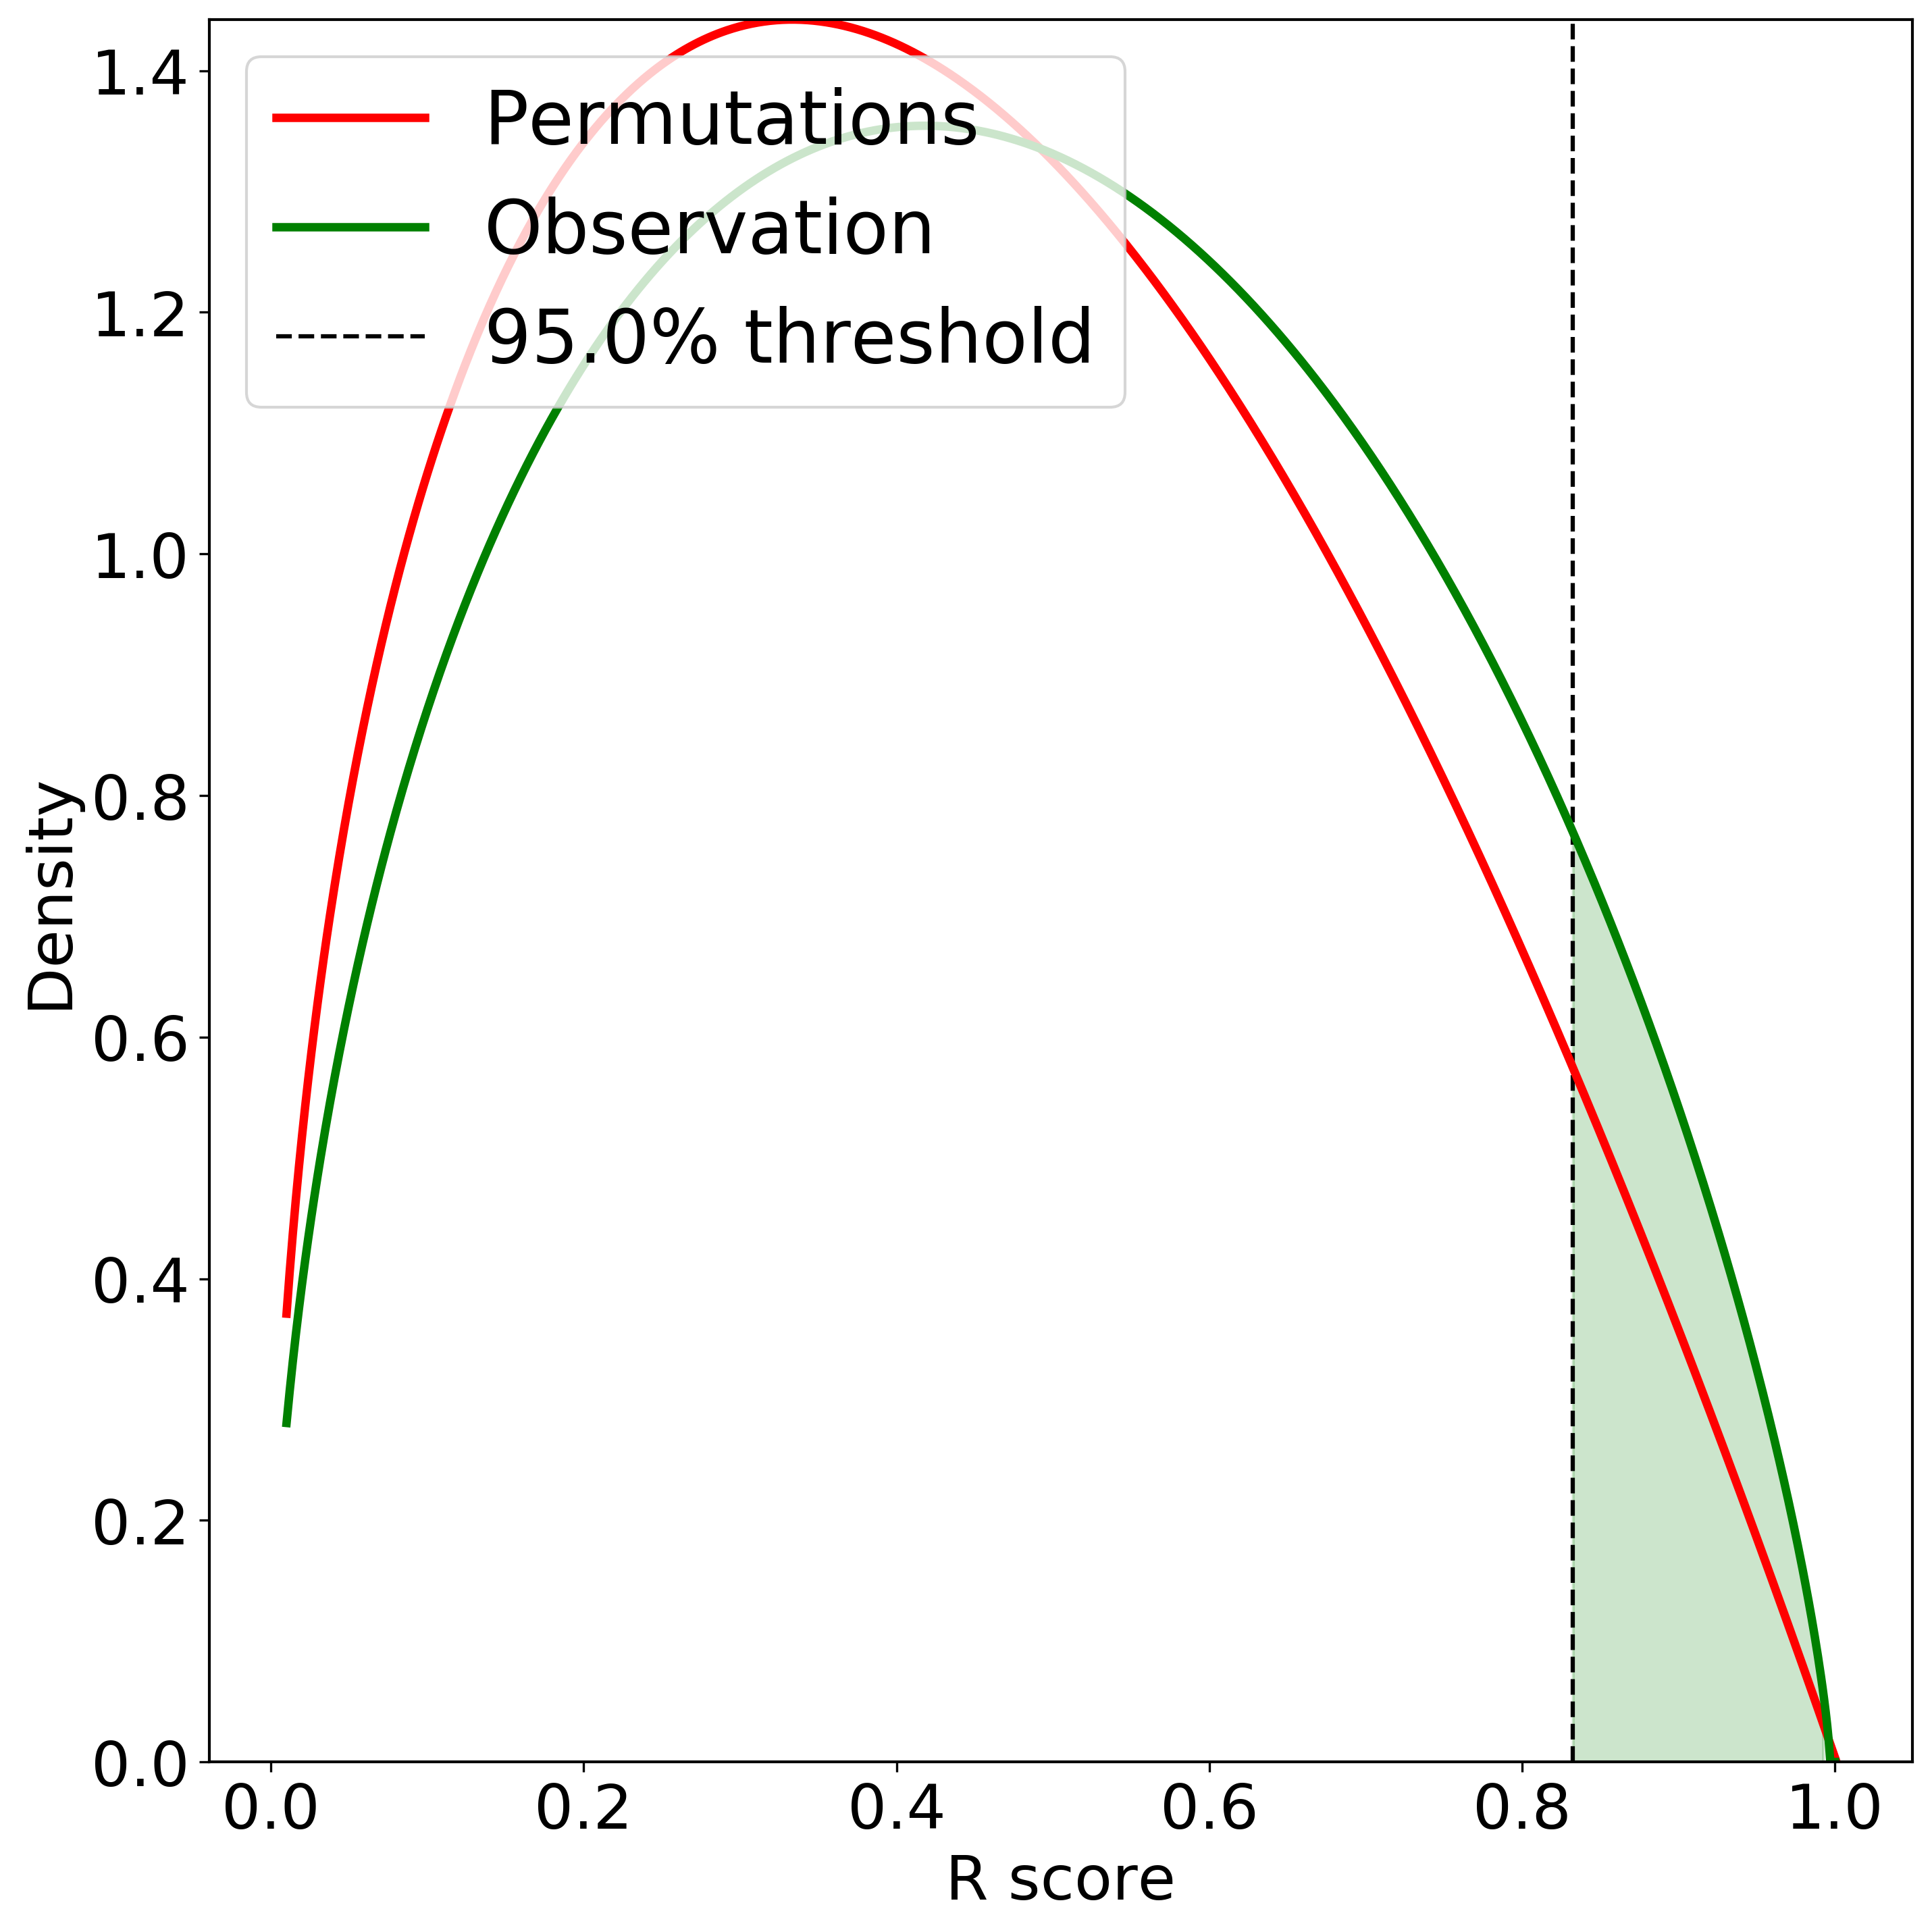

In [6]:
models_pvalue_table=pa.plot_gof(poly_obs_fit_scores, sig_obs_fit_scores, poly_perm_fit_scores, sig_perm_fit_scores, dist_obs=False, dist_perm=False)

In [7]:
models_pvalue_table

{'sigmoidal': [1324148925.0, 4.4015983993081575e-133, 0.7646720199755914],
 1: [1557960165.0, 2.383328215467014e-198, 0.5352295646712358],
 2: [1436868270.0, 1.8441464999785026e-74, 0.6976610242274723],
 3: [1368183963.5, 5.102389106174335e-31, 0.8324200100214371]}

# Cluster genes and plot groups

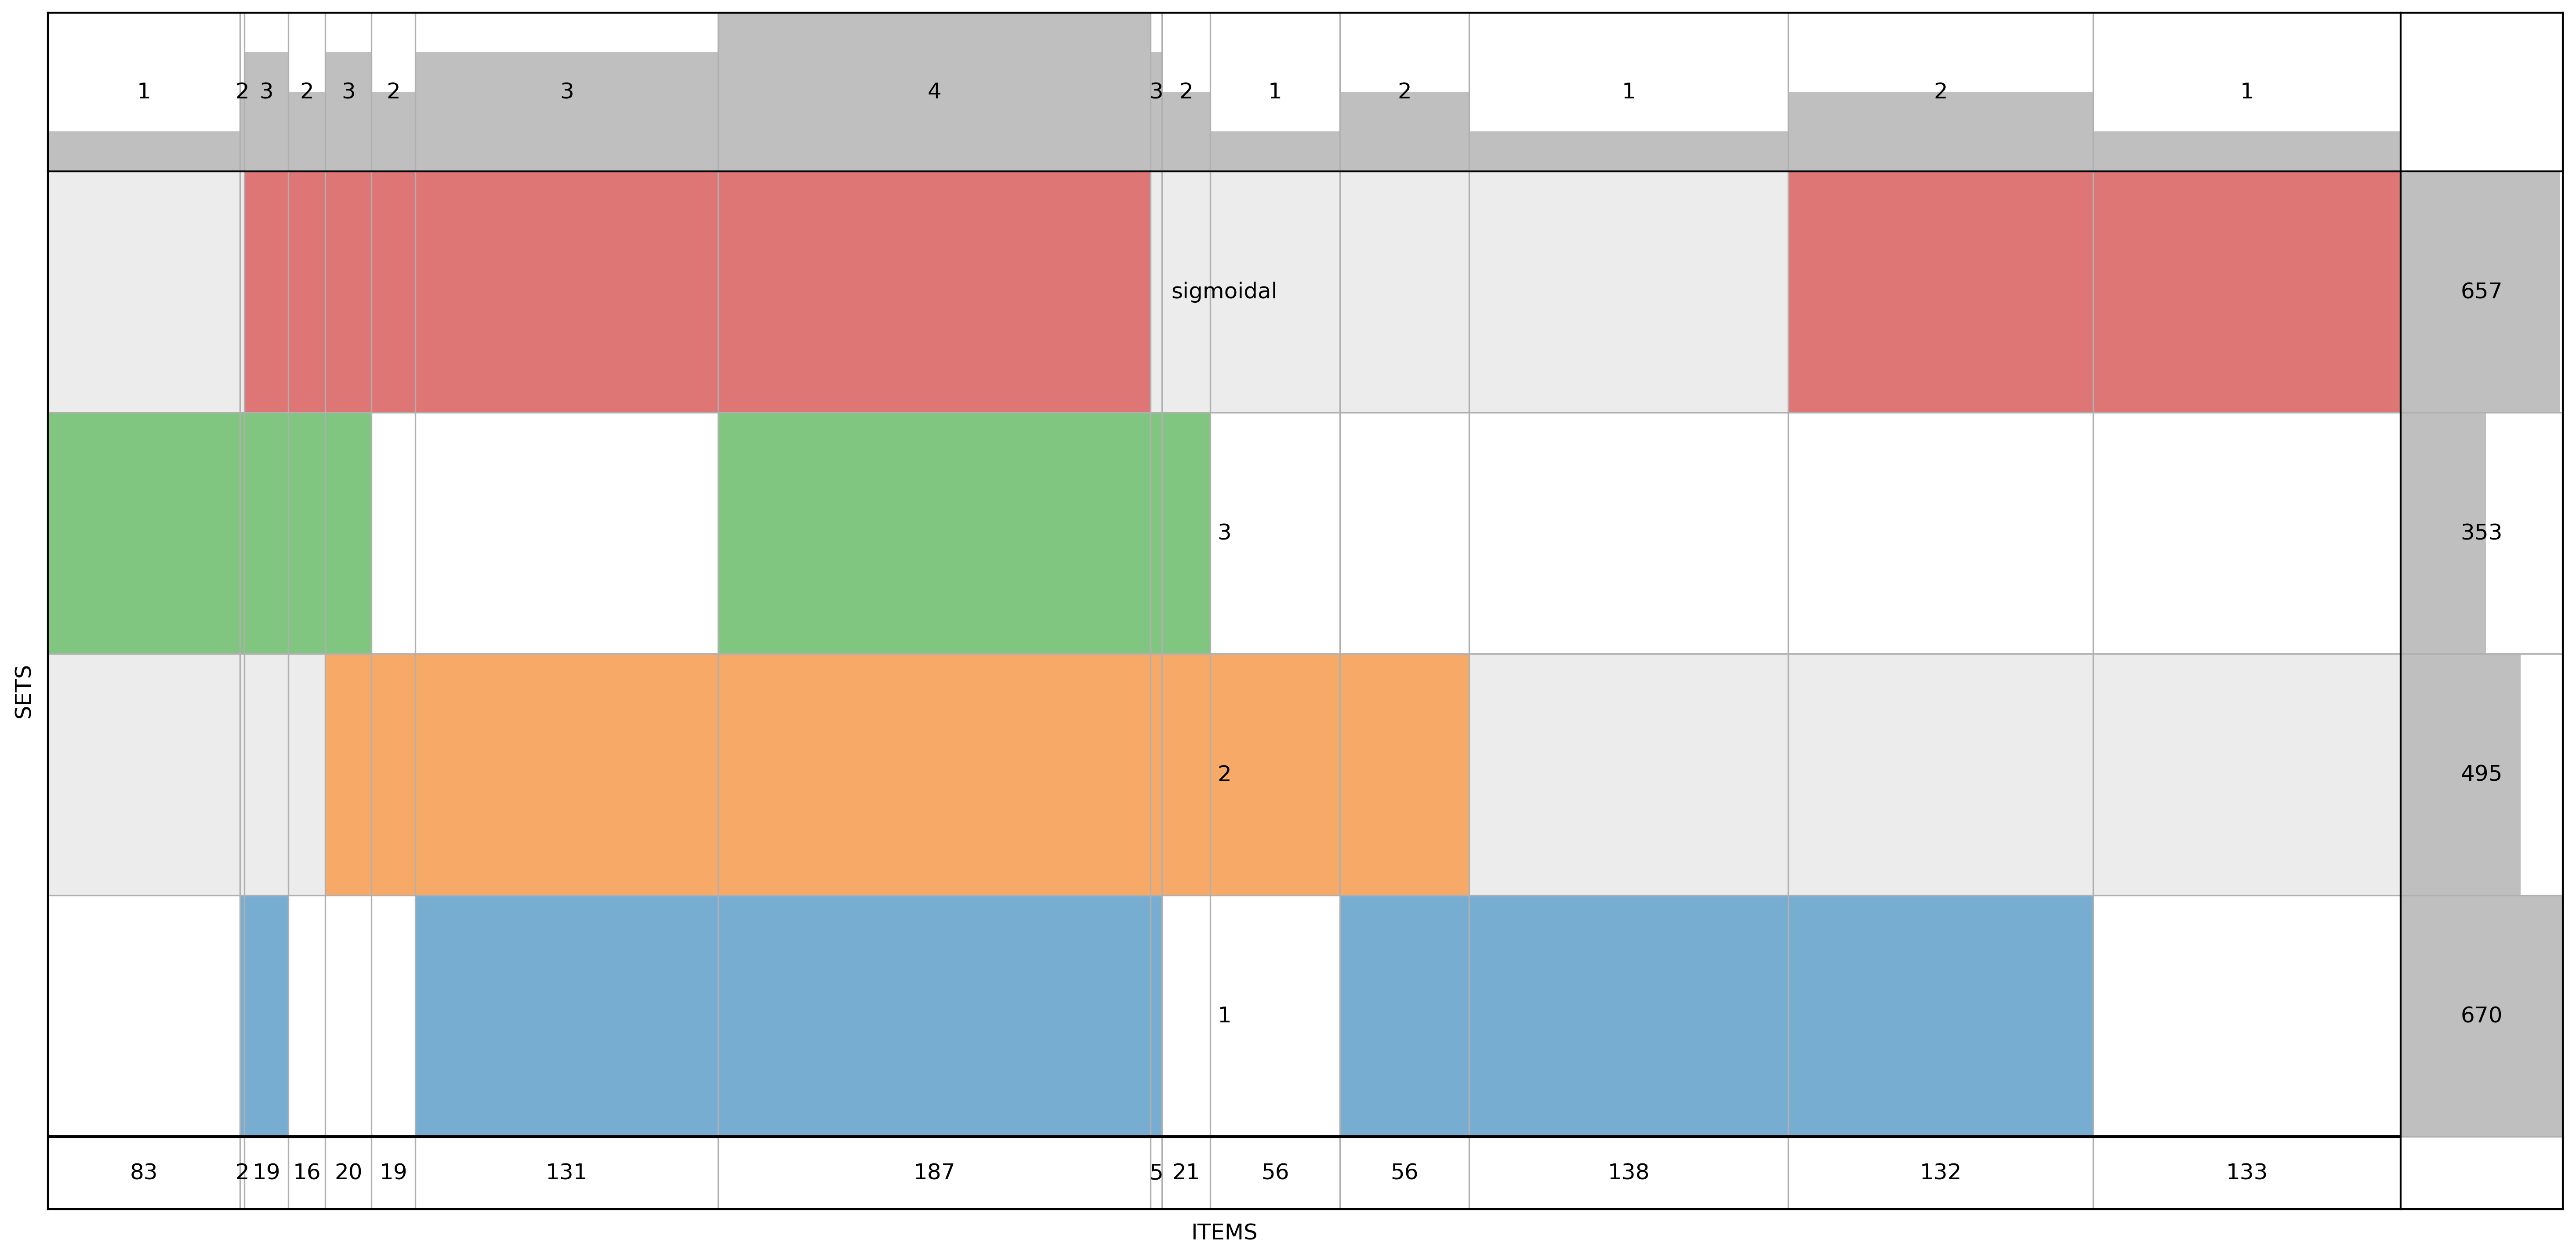

In [8]:
genes_clusters=pa.cluster_genes(models_scores)
pa.plot_clusters(genes_clusters)

# Generate summary table with scores og genes for each tested model

In [9]:
summary=pa.get_summary_table(genes_clusters, models_scores)
summary

,1,1_score,2,2_score,3,3_score,sigmoidal,sigmoidal_score
ENSG00000076554,True,0.641905,False,0.000000,False,0.000000,True,0.825970
ENSG00000044459,True,0.566645,True,0.822632,True,0.851511,True,0.939537
ENSG00000114742,False,0.000000,False,0.000000,True,0.956403,False,0.000000
ENSG00000103742,True,0.628712,False,0.000000,False,0.000000,False,0.000000
ENSG00000083307,False,0.000000,False,0.000000,False,0.000000,True,0.822528
...,...,...,...,...,...,...,...,...
ENSG00000077348,True,0.714013,True,0.735834,False,0.000000,True,0.879805
ENSG00000077549,True,0.621059,False,0.000000,False,0.000000,False,0.000000
ENSG00000109917,False,0.000000,False,0.000000,False,0.000000,True,0.773974
ENSG00000114026,True,0.573066,False,0.000000,False,0.000000,True,0.819416


# Assign each gene to the best fitting model

In [ ]:
continuum_genes, sigmoid_genes, discarded_genes = pa.classify_genes(summary)

# Plot distribution of inflexion point for each gene

<lambdifygenerated-1>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


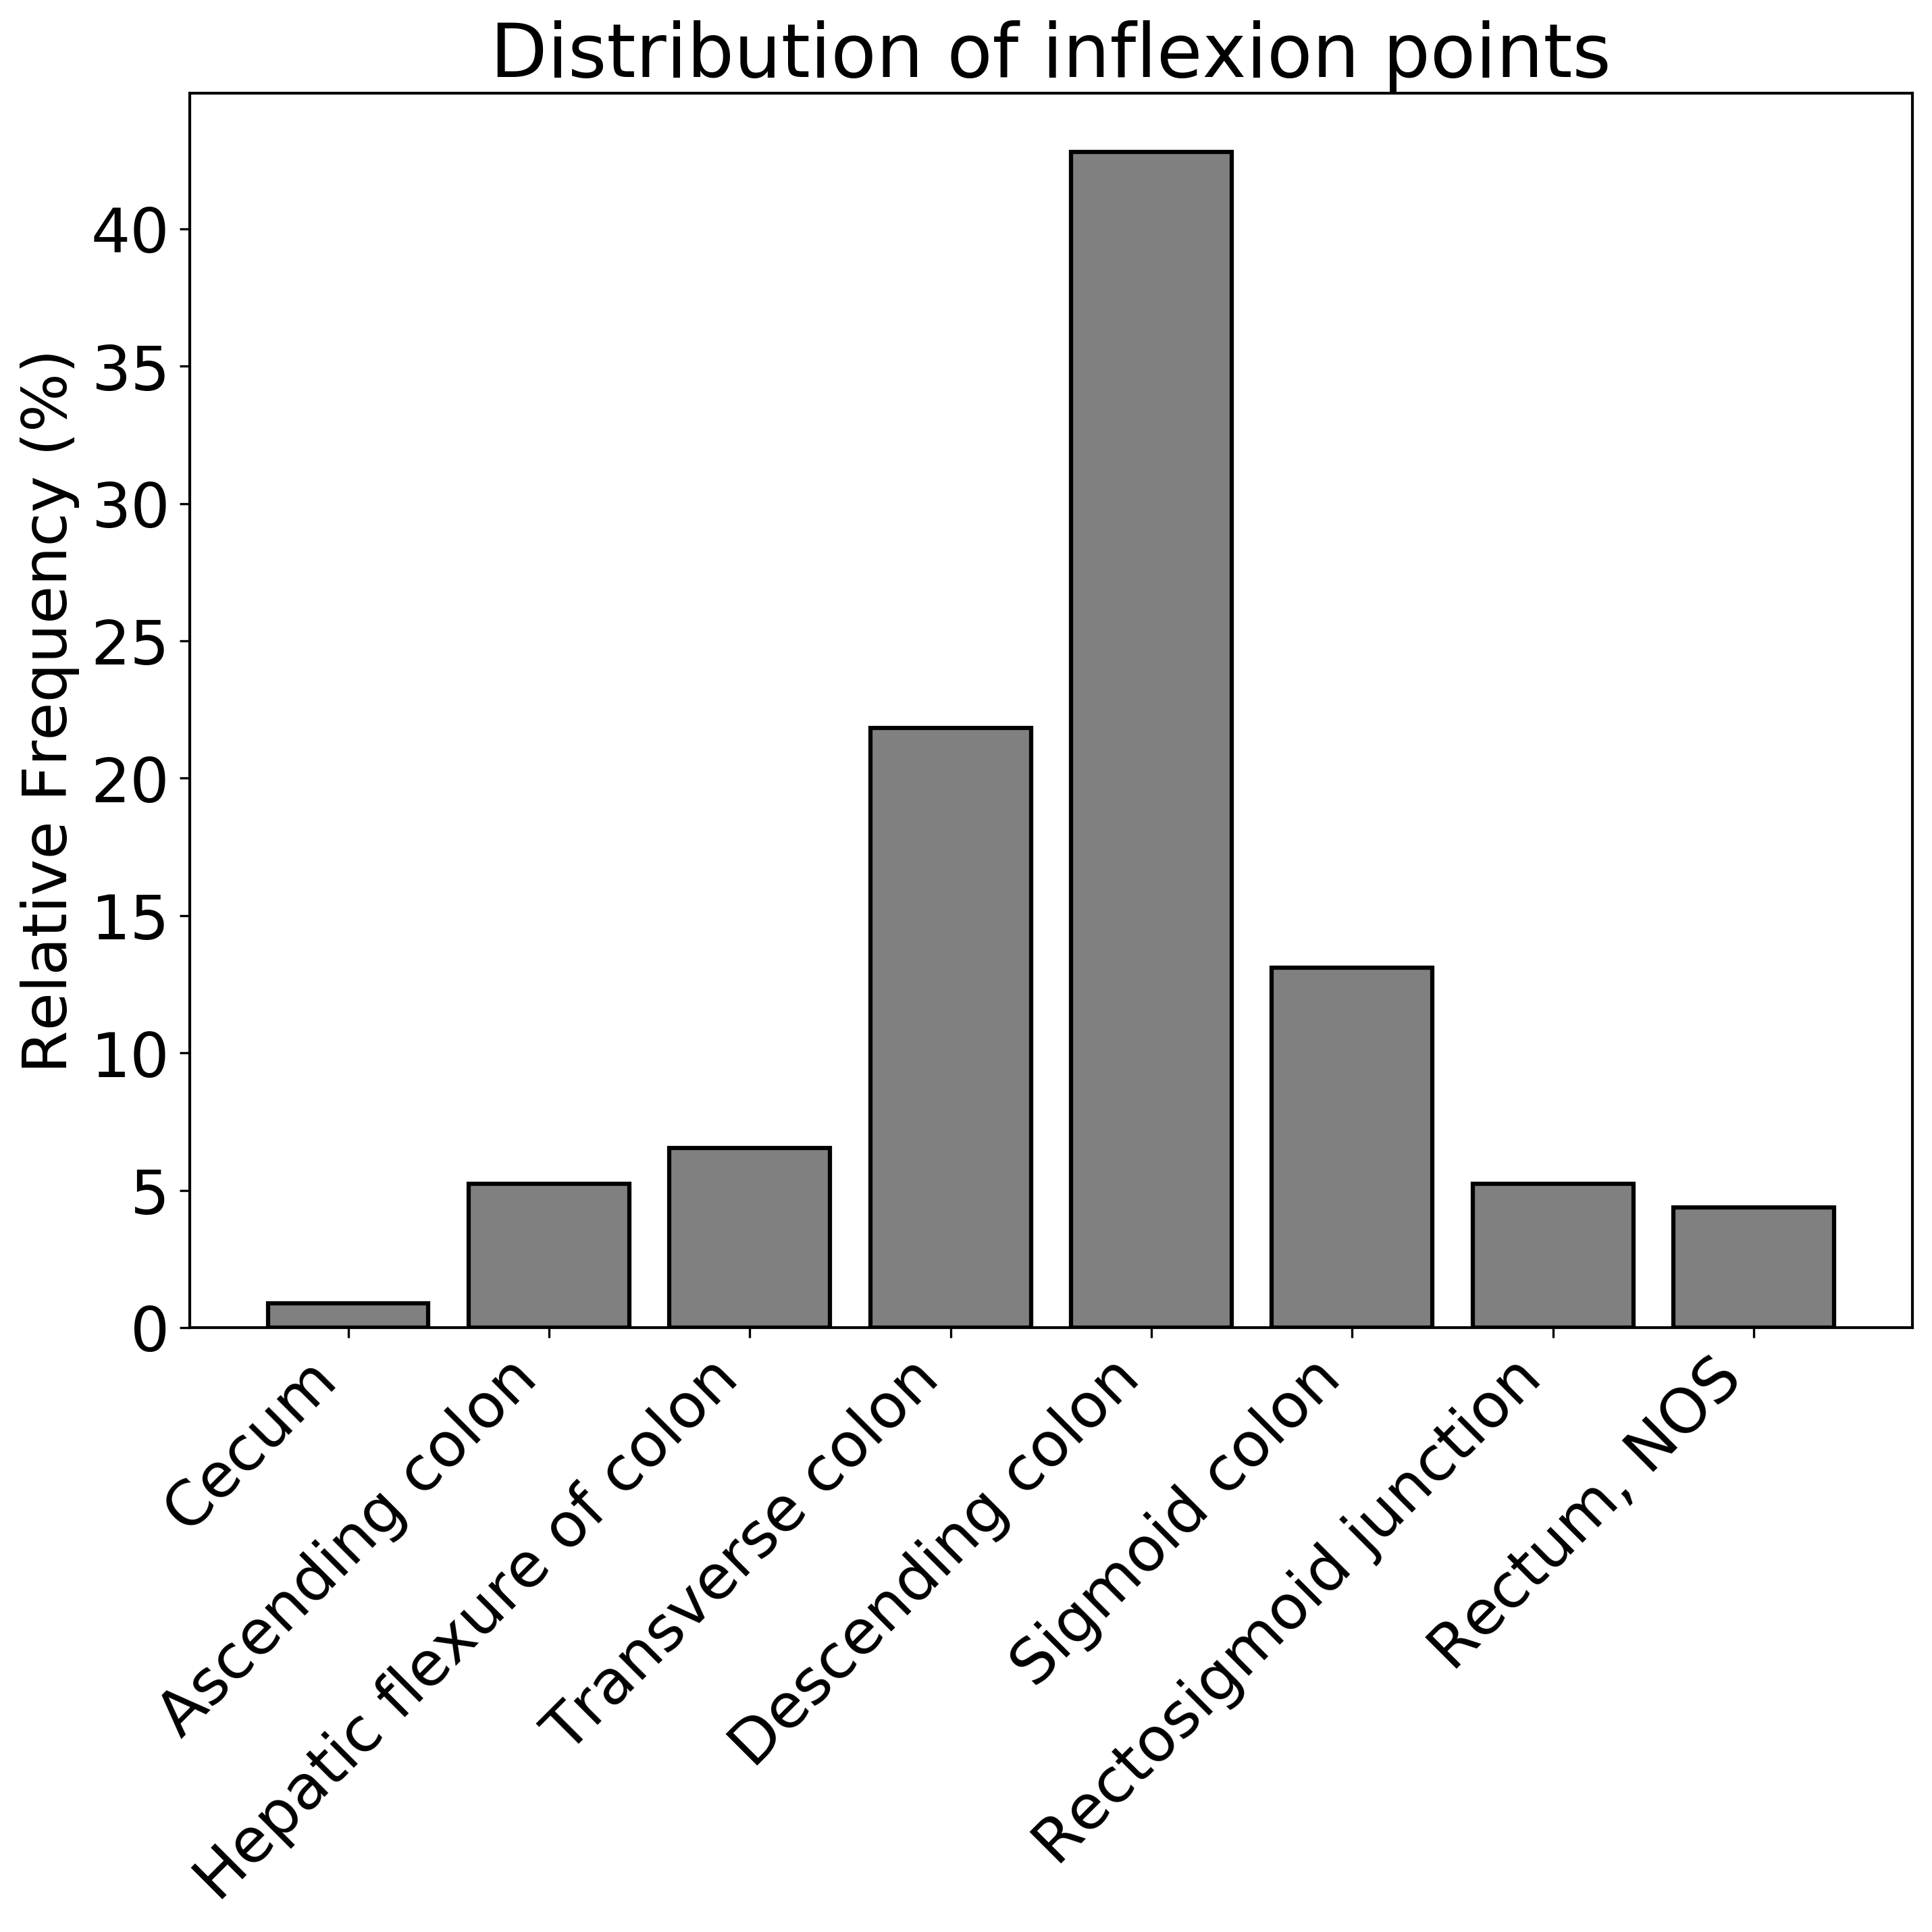

In [11]:
gene_list, section_l = pa.strict_sig_list(sigmoid_genes, sig_models, plot_dist = True)

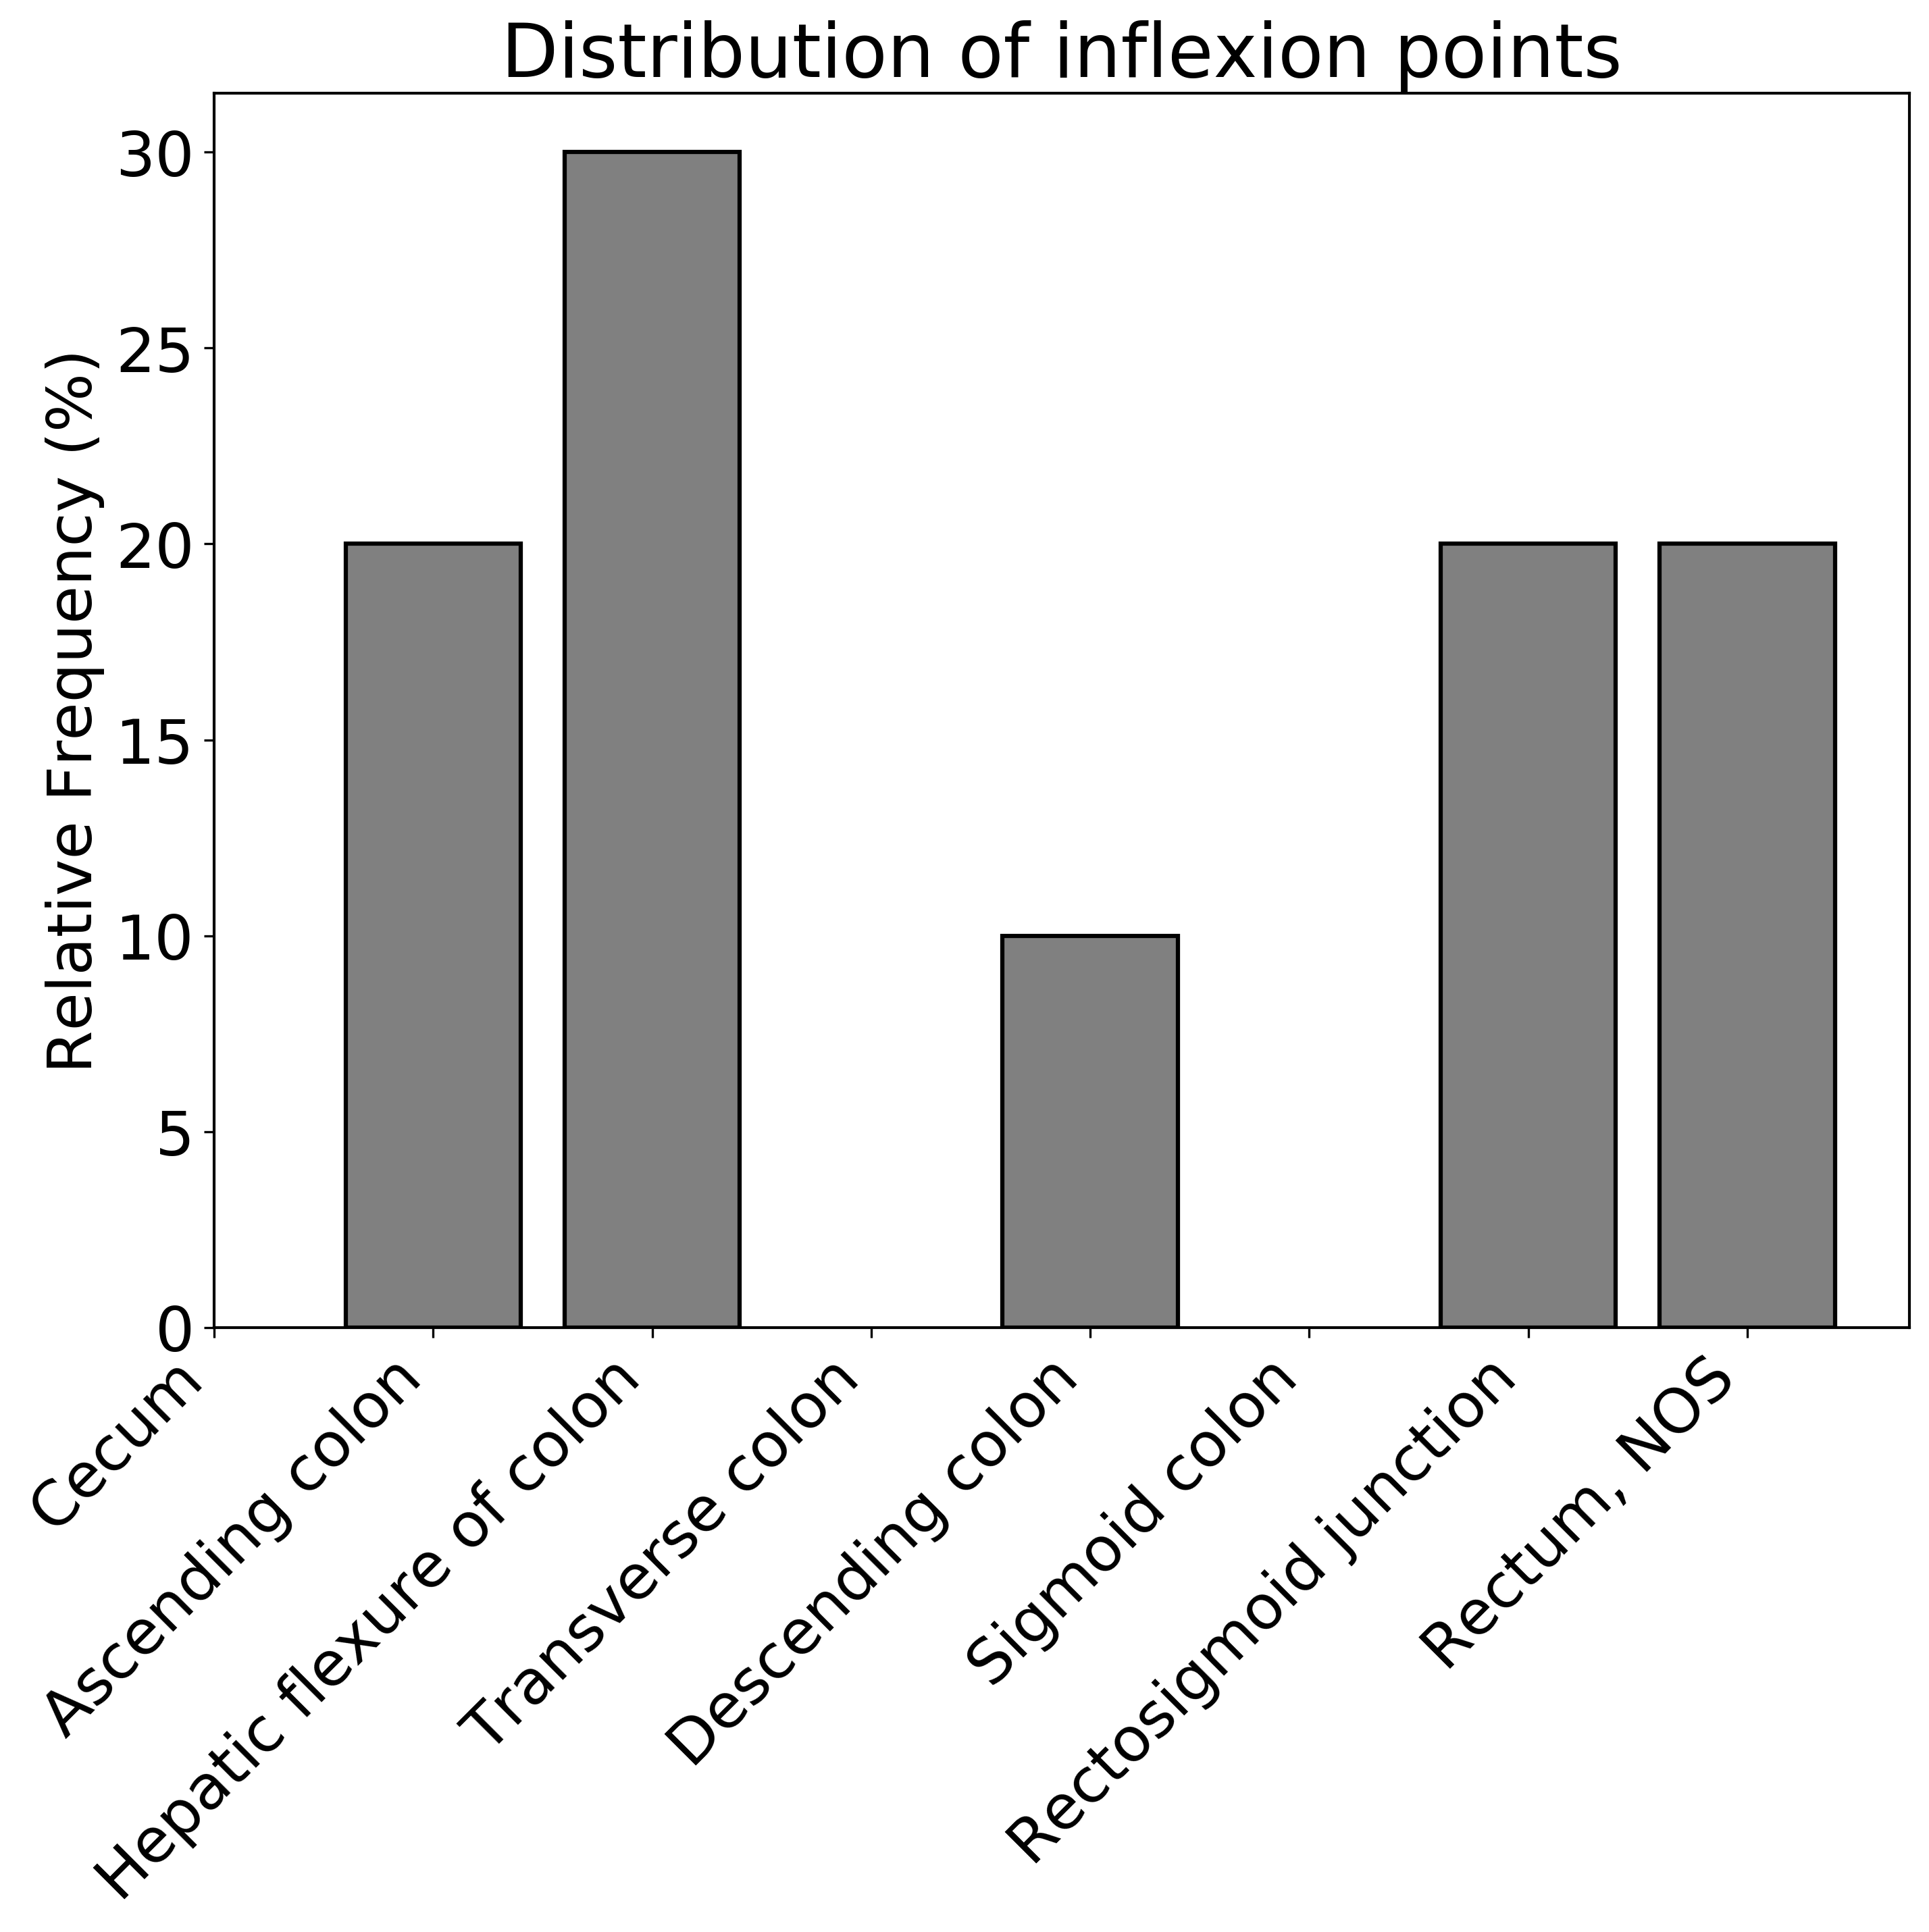

In [13]:
pa.strict_sig_list_random(medians, mad, sigmoid_genes, sig_models, plot_dist = True)